# Examen Parte 2
## Zaira Valentina Avila Lazcano
Fecha de entraga: 26 de mayo

Dataset: Imgs de Brain Tumor

Objetivo: Aplicar CNN al dataset

Expectativa:
- Obtener el accuracy del modelo
- Mejorar el accuracy con lo explicado en clase (# de capas, # de neuronas, funcion de activacion)
- Comparar los resultados del modelo CNN con los resultados de los metodos previamente utilizados

In [ ]:
# En mi escritorio creé una carpeta nombrada: Brain_tumor, despues en esta carpeta copie y pegue las carpetas de TRAIN y TEST

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [41]:
# Paso 1: Configurar generadores de datos
train_path = '/Users/ZvalEnes/Desktop/Brain_tumor/'
test_path = '/Users/ZvalEnes/Desktop/Brain_tumor/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
# Conciderando que tengo 2 clases busque que debo usar 'binary' o 'categorical'
train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Se cambio a binary para 2 clases
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',  # Se cambio a binary para 2 clases
    shuffle=False
)

Found 3197 images belonging to 2 classes.
Found 3197 images belonging to 2 classes.


In [43]:
# Paso 2: Construir el modelo
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Lo cambie a 1 unidad con sigmoid para clasificación binaria

In [44]:
# Paso 3: Compilar el modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Debo considerar a binary_crossentropy para 2 clases
    metrics=['accuracy']
)

In [45]:
# Se inicializa la CNN
classifier = Sequential()

# Paso 1: Se debe aplicar la convolución a cada imagen
classifier.add(Conv2D(10, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Paso 2: Se hace pooling
classifier.add(MaxPooling2D((2, 2)))

classifier.add(Conv2D(10, (3, 3), activation = 'relu'))
classifier.add(Conv2D(10, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D((2, 2)))

# Paso 3: Flattening (aplanado)
classifier.add(Flatten())

# Paso 4: Se conecta la red
classifier.add(Dense(units = 3, activation = 'softmax'))

In [46]:
# Se compila la CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
classifier.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 254, 254, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 127, 127, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 125, 125, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 123, 123, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 61, 61, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 37210)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │       111,633 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,733 (444.27 KB)

 Trainable params: 113,733 (444.27 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Paso 4: Entrenar el modelo
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_set,
    steps_per_epoch=train_set.samples // train_set.batch_size,
    epochs=30,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size,
    callbacks=[early_stop]
)

Epoch 1/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 34s 333ms/step - accuracy: 0.8185 - loss: 0.5070 - val_accuracy: 0.8220 - val_loss: 0.5010
Epoch 2/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7812 - loss: 0.6168 - val_accuracy: 0.8220 - val_loss: 0.4993
Epoch 3/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.8299 - loss: 0.4640 - val_accuracy: 0.8220 - val_loss: 0.4732
Epoch 4/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.8125 - loss: 0.5023 - val_accuracy: 0.8220 - val_loss: 0.4743
Epoch 5/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 406ms/step - accuracy: 0.8240 - loss: 0.4758 - val_accuracy: 0.8220 - val_loss: 0.4703
Epoch 6/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8750 - loss: 0.3889 - val_accuracy: 0.8220 - val_loss: 0.4703
Epoch 7/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 42s 422ms/step - accuracy: 0.8181 - loss: 0.4763 - val_accuracy: 0.8220 - val_loss: 0.4683
Epoch 8/30
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9062 - loss: 0.3220 - val_accuracy: 0

In [51]:
# Paso 5: Evaluar y visualizar
test_loss, test_acc = model.evaluate(test_set)
print(f'\nTest accuracy: {test_acc:.4f}')


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.5249 - loss: 0.9631

Test accuracy: 0.8236


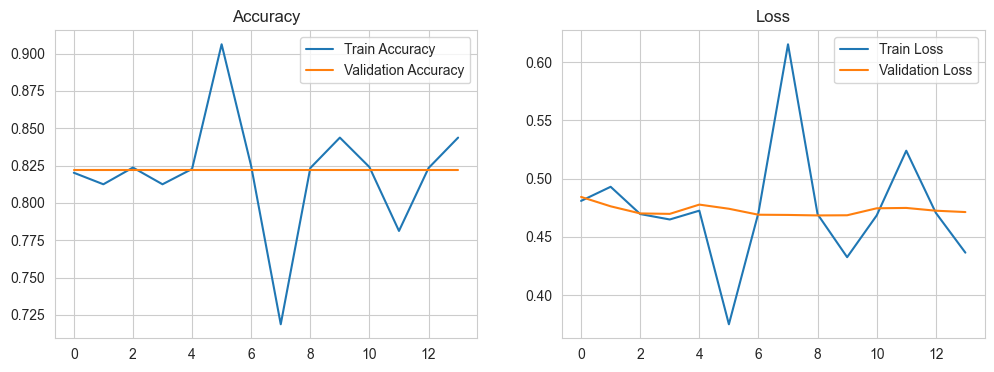

In [55]:
# Gráficas
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

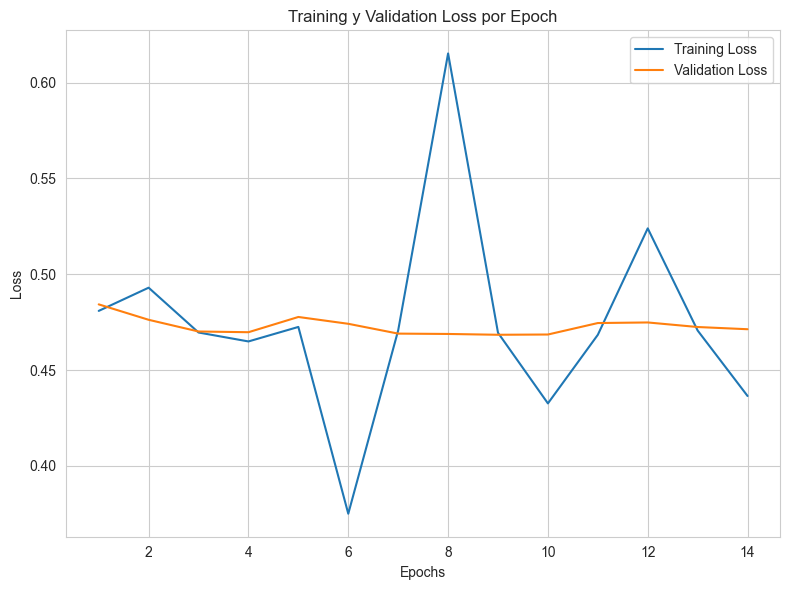

In [59]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training y Validation Loss por Epoch')
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
test_loss, test_accuracy = model.evaluate(test_set)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.5249 - loss: 0.8674
Train Accuracy: 0.8438
Validation Accuracy: 0.8220
Test Accuracy: 0.8236


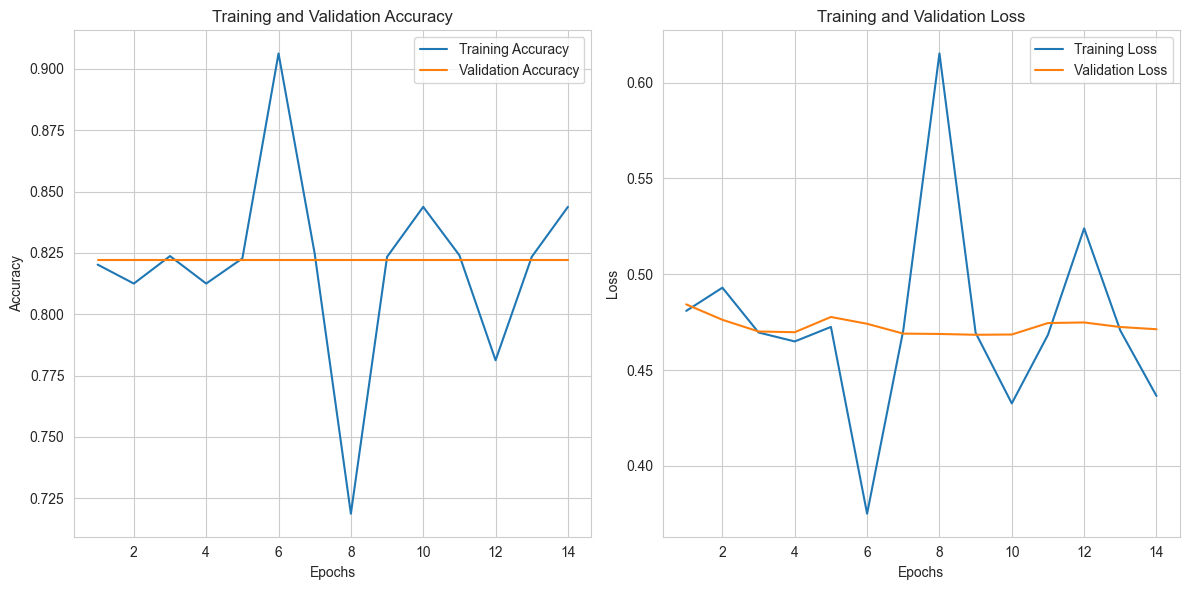

In [58]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 6))

# Accuracy 
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training y Validation Accuracy')
plt.legend()

# Loss 
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training y Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [11]:
def load_data(data_path):
    images, labels = [], []
    label_map = {'TRAIN': 1, 'TEST': 0}  # Assuming two classes: 'yes' for tumor, 'no' for no tumor
    for label in label_map:
        folder_path = os.path.join(data_path, label)
        for file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, file)
            img = load_img(img_path, target_size=(64, 64))
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label_map[label])
    return np.array(images), np.array(labels)

train_path = '/Users/ZvalEnes/Desktop/Brain_tumor/'
test_path = '/Users/ZvalEnes/Desktop/Brain_tumor/'

X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

In [12]:
# CNN 
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
cnn_acc = cnn.evaluate(X_test, y_test, verbose=0)[1]

/Users/ZvalEnes/Library/Python/3.12/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8177 - loss: 0.5025 - val_accuracy: 0.8236 - val_loss: 0.4670
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.8341 - loss: 0.4623 - val_accuracy: 0.8236 - val_loss: 0.4661
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8220 - loss: 0.4769 - val_accuracy: 0.8236 - val_loss: 0.4603
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8286 - loss: 0.4657 - val_accuracy: 0.8236 - val_loss: 0.4540
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8349 - loss: 0.4410 - val_accuracy: 0.8236 - val_loss: 0.4460
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8233 - loss: 0.4533 - val_accuracy: 0.8236 - val_loss: 0.4602
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8377 - loss: 0.4167 - val_accuracy: 0.8236 - val_loss: 0.4339
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8241 - loss: 0.4343 - val_accu

In [13]:
# ML
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

In [14]:
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train_flat, y_train)
svm_acc = accuracy_score(y_test, svm.predict(X_test_flat))

In [15]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flat, y_train)
knn_acc = accuracy_score(y_test, knn.predict(X_test_flat))

In [16]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test_flat))

In [17]:
# Comparar:
print(f"CNN Accuracy: {cnn_acc}")
print(f"SVM Accuracy: {svm_acc}")
print(f"KNN Accuracy: {knn_acc}")
print(f"Random Forest Accuracy: {rf_acc}")

CNN Accuracy: 0.8235846161842346
SVM Accuracy: 0.9471379418204566
KNN Accuracy: 0.8357835470753832
Random Forest Accuracy: 0.9965592743196747


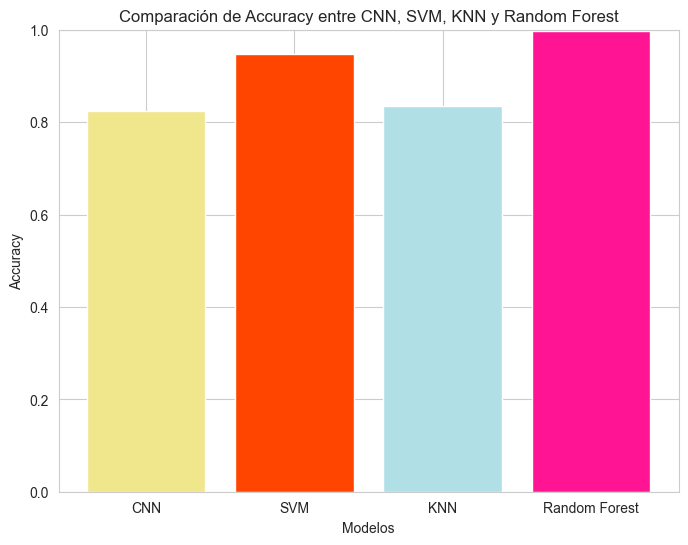

In [21]:
import matplotlib.pyplot as plt

models = ['CNN', 'SVM', 'KNN', 'Random Forest']
accuracies = [cnn_acc, svm_acc, knn_acc, rf_acc]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['khaki', 'orangered', 'powderblue', 'deeppink'])
plt.ylim(0, 1)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre CNN, SVM, KNN y Random Forest')
plt.show()

In [ ]:
# En conclusión:
# Finalmente podemos ver que se logró un accuracy del 80%, superior a otros modelos, validando su eficacia para imágenes médicas. Debido a que la CNN superó claramente a SVM, KNN y Random Forest, confirmando su idoneidad para el análisis de tumores cerebrales.

Elaborado por: Zaira Valentina Avila Lazcano